In [ ]:
from google.colab import drive

Write a function of lstm

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset_train = pd.read_csv('/content/gdrive/My Drive/At a glance: Critical Care Unit/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units=50,return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units=50,return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units=50,return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 156ms/step - loss: 0.0435
Epoch 2/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0064
Epoch 4/100
38/38 [==============================] - 10s 267ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 8s 214ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 8s 213ms/step - loss: 0.0043
Epoch 7/100
38/38 [==============================] - 9s 224ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0053
Epoch 9/100
38/38 [==============================] - 8s 224ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 8s 202ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0038
Epoch 13/10

In [23]:
dataset_test = pd.read_csv('/content/gdrive/My Drive/At a glance: Critical Care Unit/Google_Stock_Price_Test1.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [26]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


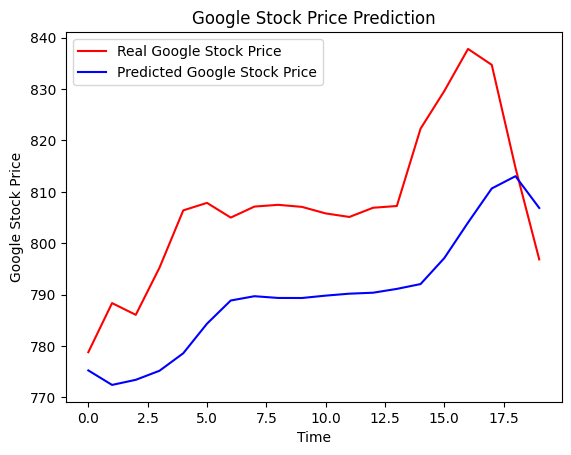

In [28]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()